The Steps:

Get the dataset (pre-normalized, inputs and labels)

Forward pass: input -> function (model) -> output (prediction)

Compute the loss

Backward pass

Update the parameters (weights and biases)

In [1]:
from pathlib import Path
import requests

# get the dataset
DATA_PATH = Path('data')
PATH = DATA_PATH / 'mnist'
PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open('wb').write(content)

In [2]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

print(x_train.shape)

(50000, 784)


5


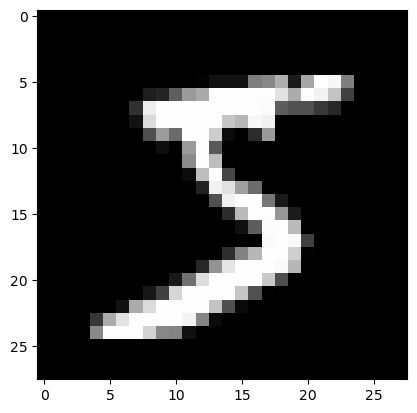

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# examine the dataset

plt.imshow(x_train[0].reshape((28, 28)), cmap='grey')
print(y_train[0])

*pytorch tensors are similar to numpy arrays but with more restrictions that increase performance (numeric)

*includes Autograd - automatically compute gradients (derivatives)

In [4]:
import torch

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

In [6]:
import math
# weights and biases
# NN architecture: input -> output
# # of neurons in the input layer: 784 (28**2); output layer 10
# pytorch transposes tensors, must reverse [w * x + b] -> [x * w + b]

torch.manual_seed(0)
weights = torch.rand(784, 10) / math.sqrt(784) # Xavier init
weights.requires_grad_() # underscore applies function in place
biases = torch.zeros(10, requires_grad=True)

In [7]:
def model(xb): # b for batch
    return xb @ weights + biases # '@' matrix multiplication

In [17]:
def softmax(z): # p_i = e**z_i/sum(e**z_all)
    return z.exp() / z.exp().sum(-1).unsqueeze(-1)
# x.exp applies e**x across the entire tensor
# x.exp().sum(-1) sums the exponentials accross last dimension (classes)
# .unsqueeze adds dimension to 1d array from sum

def cross_entropy_loss(pred, targets):
    bs, out_features = pred.shape
    one_hot_encoded_targets = torch.eye(out_features)[targets]
    #cross entropy formula H(p,q) = (Negative, b/c loss) E_x p(x)*log(q,x)/batch size
    return -(one_hot_encoded_targets * softmax(pred).log()).sum() / bs

In [15]:
bs = 64 #batch size

In [14]:
def accuracy_func(pred, yb):
    pred_class = torch.argmax(pred, dim=1) #max value's index from dimension 1
    return (pred_class == yb).float().mean() # tensor output, assume float numerizes bool and then average returns %


In [18]:
learning_rate = 0.5
epochs = 2
n_data_points = x_train.shape[0] # 50000
n_batches = (n_data_points + bs - 1) // bs # ceiling div

for epoch in range(epochs):
    for i in range(n_batches):
        start_i = i*bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = cross_entropy_loss(pred, yb)
        accuracy = accuracy_func(pred, yb)
        loss.backward()

        with torch.no_grad():
            weights -= weights.grad * learning_rate
            biases -= biases.grad * learning_rate
            weights.grad.zero_()
            biases.grad.zero_() #without zeroing, gradients accumulate

        if i % 100 == 0:
            print(f'loss: {loss.item():6f}, acc: {accuracy.item()*100:0.1f}%')

loss: 2.295827, acc: 10.9%
loss: 0.317735, acc: 90.6%
loss: 0.300753, acc: 89.1%
loss: 0.388501, acc: 92.2%
loss: 0.235343, acc: 90.6%
loss: 0.380685, acc: 89.1%
loss: 0.262406, acc: 89.1%
loss: 0.378015, acc: 90.6%
loss: 0.279513, acc: 92.2%
loss: 0.261760, acc: 92.2%
loss: 0.196382, acc: 90.6%
loss: 0.342657, acc: 92.2%
loss: 0.210061, acc: 93.8%
loss: 0.354094, acc: 89.1%
loss: 0.225843, acc: 92.2%
loss: 0.361857, acc: 89.1%


EUREKA!!, previous file (garbage.ipynb) contains bits of previous code, I let ai chew it up after some errors produced fishy results, could not validate due to errors in source material but will stop here because 10% -> 90% accuracy were the numbers I was aiming for with round 2.